In [2]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h1>1. La subsecuencia común más larga (SCL) apartir de la matriz C construida.</h1>

In [80]:
global C

def lcs(X,Y):
    global C
    C = np.ones((len(X)+1,len(Y)+1))*-1
    lcs3(X,Y,len(X),len(Y))
    return C[len(X)-1,len(Y)-1], C
    

def lcs3(x,y,i,j):
    global C
    if C[i,j] == -1:
        if i == 0 or j == 0:
            C[i,j] = 0
        else:
            if x[i-1]==y[j-1]:
                C[i,j] = lcs3(x,y,i-1,j-1)+1
            else:
                C[i,j] = max(lcs3(x,y,i-1,j),lcs3(x,y,i,j-1))
                
    return C[i,j]

<h3> Algoritmo que retorna la cadena mas larga a partir de la matriz creada por el algoritmo anterior</h3>

In [89]:
def cadena_lsc(X,Y,C):
    j=len(Y)
    i=len(X)
    ca=''
    while(C[i][j]>0 and i >= 0 and j >=0):
        if(C[i][j-1] == C[i][j]):
            j=j-1;
            continue;
        if(C[i-1][j] == C[i][j] ):
            i=i-1;
            continue;    
        val = Y[j-1]
        ca+=val;
        i=i-1;
        j=j-1;
    cb=ca[::-1]
    print (cb);

In [90]:
len_lcs, lcs_mat = lcs('ABCDEER','ABCDEFG')
print (lcs_mat);
cadena_lsc('ABCDEER','ABCDEFG',lcs_mat)

[[ 0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  2.  2.  2.  2.  2.  2.]
 [ 0.  1.  2.  3.  3.  3.  3.  3.]
 [ 0.  1.  2.  3.  4.  4.  4.  4.]
 [ 0.  1.  2.  3.  4.  5.  5.  5.]
 [ 0.  1.  2.  3.  4.  5.  5.  5.]
 [ 0.  1.  2.  3.  4.  5.  5.  5.]]
ABCDE


<h1> 2. Problema del corte de la barilla</h1>

<p>Implementación simple de arriba hacia abajo (top-down)<p>


In [2]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [3]:
p = [1,5,8,9,10,17,17,20,24,30]

In [5]:
sol = cut_rodR(p,8)
print (sol)

22


In [122]:
import time
import random as rnd
def time_analysis_cut_rodR(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        cut_rodR(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [123]:
print (time_analysis_cut_rodR(8))

[2.2222241966574074e-06, 6.222227739272057e-06, 4.444448393314815e-06, 7.5555622629508434e-06, 1.5111124554323396e-05, 2.9777804229524918e-05, 6.000005333817171e-05, 0.00012000010667634342]


<p> Implementación de arriba hacia abajo con memorización (memoization)</p>

In [117]:
def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))
    r[n]=q
    return q

In [118]:
sol = memo_cut_rodTD(p,8)
print (sol)

22


In [119]:
import time
import random as rnd
def time_analysis_cut_rodTD(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodTD(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [120]:
print (time_analysis_cut_rodTD(8))

[3.1111138696360285e-06, 8.000007113651009e-06, 6.666672589972222e-06, 8.444451964351174e-06, 1.1555565805565493e-05, 1.5111124554323396e-05, 1.9111128096938046e-05, 2.4444466163231482e-05]


<p> Implementación abajo hacia arriba (bottom-up) con memorización</p>

In [106]:
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]


In [124]:
sol = memo_cut_rodBU(p,8)
print (sol)

22


In [125]:
import time
import random as rnd
def time_analysis_cut_rodBU(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodBU(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

In [126]:
print (time_analysis_cut_rodBU(8))

[3.1111138696360285e-06, 8.000007113651009e-06, 5.333338066293436e-06, 7.111117440672388e-06, 9.333341608908086e-06, 1.2444455506965824e-05, 1.5111124525901687e-05, 1.866668327465959e-05]


<h3> cortes que se deben realizar para Implementación abajo hacia arriba (bottom-up) con memorización</h3>

In [103]:
def mostrar_secuencia(lista,n,contador):
    aux=lista[n-1]
    aux2=[]
    if(0 in aux):
        return aux;
    else:
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[0]),contador))
        contador=contador+1
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[1]),contador))
        
        posva=0
        listaF=[]
        for i in range(0,len(aux2)):
            for j in range(0,2):
                if(aux2[i][j]!=0):
                    listaF.insert(posva,int(aux2[i][j]))
                    posva=posva+1
        
    return listaF

def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    lista=[]
    
    for j in range(1,n+1):
        auxiliar1=0
        auxiliar2=0
        aux=np.zeros(2)
        q = float('-inf')
        for i in range(1,j+1): 
            if(q<p[i-1]+r[j-i]):
                auxiliar1=i
                auxiliar2=j-i
            
            
            q = max(q, p[i-1]+r[j-i])
            
            
        r[j] = q
        aux[0]=int(auxiliar1)
        aux[1]=int(auxiliar2)
        
        lista.insert(j,aux)
    aux3=mostrar_secuencia(lista,n,0);
    print(aux3)
    
    return r[n]

In [105]:
sol = memo_cut_rodBU(p,8)
print (sol)

[2, 6]
22


<h4> Análisis del tiempo</h4>

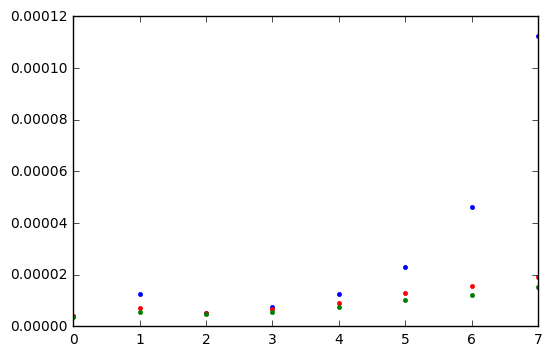

In [131]:
pl.clf()
x = np.arange(8)
y = np.array(time_analysis_cut_rodR(8))  #primer algoritmo
pl.plot(x, y, 'k.',color='blue')
x = np.arange(8)
y = np.array(time_analysis_cut_rodTD(8)) #Top down
pl.plot(x, y, 'k.',color='red')
x = np.arange(8)
y = np.array(time_analysis_cut_rodBU(8)) #B Up
pl.plot(x, y, 'k.',color='green')

<h1>3. Distancia de edición entre dos cadenas.</h1>
<p> se uso el algoritmo de distancia de Levenshtein</p>

In [78]:
def distance_Levenshtein(cadena1, cadena2):
    d=np.zeros((len(cadena1),len(cadena2)))
    costo=0
    for i in range(len(cadena1)):
        d[i][0]=i
       
    for i in range(len(cadena2)):
        d[0][i] = i
    
    for i in range(1, len(cadena1)):
        for j in range(1, len(cadena2)):
            if(not cadena1[i-1] == cadena2[j-1]):
                costo=1
            else:
                costo=0
            d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+costo)
   
    return d[len(cadena1)-1][len(cadena2)-1]

In [79]:
print distance_Levenshtein("distancia","distrancia")

1.0


<h1>4. Problema del rio </h1>

In [17]:
def minimo(c,i,j,tarifa,nPuertos):
    k=0
    aux=j
    for k in range(i+1,nPuertos):
        #print("en aux: ",aux)
        #print(tarifa[i,k])
        aux=min(aux,tarifa[i,k]+c[k][j])
    return aux


def costos(nPuertos,tarifa):
    c=np.zeros((nPuertos,nPuertos))
    diagonal= nPuertos
    for diagonal in range (1, nPuertos-1):
        for i in range(1,nPuertos-diagonal):
            num=int(i+diagonal);
            #print (num)
            c[i][num]= minimo(c,i,i+diagonal,tarifa,nPuertos)
            #print(c[i][num])
    return c

In [19]:
tarifa= np.matrix('0 5 6 3 15;0 0 5 6 7;0 0 0 10 15;0 0 0 0 12; 0 0 0 0 0 ')
print (tarifa)
c=costos(5,tarifa)
print (c)

[[ 0  5  6  3 15]
 [ 0  0  5  6  7]
 [ 0  0  0 10 15]
 [ 0  0  0  0 12]
 [ 0  0  0  0  0]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  2.  3.  4.]
 [ 0.  0.  0.  3.  4.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.]]
